<div style="text-align:right;">
    <img src="./pictures/title_picture.jpg" width="100%"/>
    <figcaption><a href="https://cdnb.artstation.com/p/assets/images/images/015/063/355/large/vinnie-hughes-paradox.jpg?1546917382">Uncropped Available on Artstation</a></figcaption>
</div>

# Vorhersage von Depression auf Basis vorhandener Daten

## Table of contents
* [1. Einleitung](#einleitung)
    * [1.1 Motivation](#motivation)
    * [1.2 Forschungsfrage](#forschungsfrage)
* [2. Hauptteil](#hauptteil)
    * [2.1 Identifizierung der relevanten Features](#features)
        * [2.1.1 Herleitung der Bedeutung der Werte](#werte)
        * [2.1.2 Betrachten der Features in Zusammenhang mit Depression](#explorative)
            * [2.1.2.1 Betrachtung der Kategorie I](#explorativeK1)
            * [2.1.2.1 Betrachtung der Kategorie II](#explorativeK2)
    * [2.2 Training](#training)
        * [2.2.1 Vorgehen für das Trainieren des Machine Learning Modell](#vorgehen)
        * [2.2.2 Überprüfung der zu erreichenden Modellgüte mit den Daten](#trainingK2)
        * [2.2.3 Modell für Attribute der Kategorie I](#trainingK1)
* [3 Fazit](#fazit)


# 1. Einleitung<a class="anchor" id="einleitung"></a>


## 1.1 Motivation<a class="anchor" id="motivation"></a>
Im Jahre 2012 litten 11,6% aller Menschen in Deutschland an Depression [[1]](#statista2012), wobei ein großer Teil der Erkrankten jedoch unerkannt bleibt, da ein großer Teil der Diagnose auf Selbstbeurteilungsverfahren beruhen und sich deshalb die Patienten auch selbst über ihre depressiven Hauptsymptome klagen müssen, aber private oder berufliche Nachteile aufgrund einer ärztlichen Diagnose erwarten und diese deshalb häufig verschweigen. [[2]](#rki2010a). Dabei ist die Erkennung depressiver Erkrankungen relevant, da Menschen eine erhöhte Sterblichkeit haben aufgrund von Suiziden, Unfällen oder körperlichen Ursachen [[3]](#RoyalCollegeOfPsychiatrists2001). 

Depressive Erkrankungen können durch verschiedene Therapien gut behandelt werden, jedoch kann es immer wieder zu Rückfällen oder Wiedererkrankungen kommen. Bei Therapien und der Prävention von depressiven Episoden kann die Einbeziehung von Angehörigen förderlich sein. Zudem ist vor allem eine Prävention von Suiziden relevant. Die Steigerung von Resilienz bei den Erkrankten kann das Risiko von Rückfällen und Suiziden senken. [[4]](#rki2010b)
     
> "Es gilt, depressionsgefährdete Personen bzw. Personen,   
> die einem erhöhten Rückfallrisiko unterliegen,    
> frühzeitig zu identifizieren und ihnen geeignete therapeutische Maßnahmen anzubieten" [[5]](#rki2010c)
   
Somit können Angehörige und Bekannte bei der Erkennung von depressiven Erkrankungen und der Prävention der Risiken helfen, wenn diese die Erkrankten, welche selbst nicht als solche erkannt werden wollen, erkennen können. 

## 1.2 Forschungsfrage<a class="anchor" id="forschungsfrage"></a>
__Hauptforschungsfrage F1:__ Ist es möglich eine technische Unterstützung für die Erkennung von depressiven Erkrankungen in dem persönlichen Umfeld bereitzustellen?  

Zur Beantwortung müssen folgende Unterforschungsfragen beantwortet werden:  
__F2:__ Welche Eigenschaften sind den Menschen im direkten Umfeld um mögliche erkrankte Personen bekannt?  
__F3:__ Welche dieser Eigenschaften haben einen Einfluss auf die Erkennung der Kranken?

# 2. Hauptteil<a class="anchor" id="hauptteil"></a>
Zur Beantwortung der Fragen wird der Datensatz full data predicting depression genutzt, auf Kaggle verfügbar [[6]](#kaggle2022). 
Dafür wird im Folgenden der Datensatz eingelesen und die relevanten Features identifiziert, woraufhin auf der Basis die Modelle trainiert werden können.

## 2.1 Identifizierung der relevanten Features<a class="anchor" id="features"></a>
Der Datensatz wird in einer erweiterten Form des `pandas.DataFrame`s eingelesen und über die Funktion `info()` werden die spalten analysiert, um somit Spalten entfernen zu können, die Bekannten oder Angehörigen von möglichen Erkrankten nicht bekannt sind. Die erweiterte Funktionalität der Funktion `info()` liefert zusätzlich die Anzahl der einzigartigen Attribute und deren Anteil im DataFrame. 

Die Spalten, die den Angehörigen und bekannten bekannt sein könnten, werden in zwei Kategorien eingeteilt:
1. Kategorie I: Werte, die Angehörigen sehr wahrscheinlich bekannt sind.
2. Kategorie II: Werte, die den Angehörigen bekannt sein könnten, womit man jedoch nicht rechnen kann

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from depressionml.frame import DepressedDataFrame

np.random.seed(7)
%matplotlib inline

In [2]:
df = DepressedDataFrame("./FullData.csv")
df.info()

In [ ]:
df.info(old_version=False)

Art der Spalte                                          |   Spalten
---                                                     | ---
ID (drop)                                               | SEQN
Label (Vorhersagen)                                     | depression
Könnten genutzt werden (Kategorie I)                    | gender, age, marital_status, household_size, pregnant, asthma, asthma_currently, ever_overweight, cancer, first_cancer_type, second_cancer_type, full_time_work, work_type, out_of_work, vigorous_recreation, moderate_recreation, lifetime_alcohol_consumption, cant_work, rehab_program, current_smoker, household_smokers, heart_disease, heart_attack, stroke, heart_failure
Können möglicherweise bekannt sein (Kategorie II)       | asthma_onset, anemia, blood_transfusion, arthritis, angina, asthma_emergency, emphysema, bronchitis, liver_condition, thyroid_problem, bronchitis_currently, liver_condition_currently, thyroid_problem_currently, heart_attack_relative, asthma_relative, diabetes_relative, hay_fever, arthritis_onset, heart_failure_onset, heart_disease_onset, angina_onset, heart_attack_onset, stroke_onset, emphysema_onset, bronchitis_onset, liver_condition_onset, thyroid_problem_onset, cancer_onset, arthritis_type, weight, height, BMI, trouble_sleeping_history, sleep_hours, drinks_per_occasion, lifetime_alcohol_consumption, memory_problems, health_problem_`{Art des Problems}`, Harte Drogen (`{Droge}`_use, `{Droge}`_per_month), start_smoking_age, previous_cigarettes_per_day, current_cigarettes_per_day
Unbekannte Bedeutung                                    | limitations, healthcare_equipment, walking_equipment, limited_work
Kann Bekannten nicht (sicher) bekannt sein              | Rx_`{Medikament}`, *Medizinische Messwerte* (pulse, irregular_pulse, systolic, diastolic, total_cholesterol, HDL, triglyceride, LDL, albumin, calcium, iron, LHD...), sedentary_time, drinks_past_year, prescriptions_count
Kann nicht auf echte Werte übertragen werden            | education_level, household_income, time_in_current_job, current_smoker, first_cancer_count, second_cancer_count, third_cancer_count
Kann nicht auf Deutschland angewandt/übertragen werden  | veteran, citizenship, birth_place, birth_place, race
Nicht genug Daten                                       | fourth_cancer_count, third_cancer_type
     

### 2.1.1 Herleitung der Bedeutung der Werte<a class="anchor" id="werte"></a>
Im Folgenden wird auf Basis der Kombination von Werten der Spalten die Herleitung der Bedeutung der codierten Werte versucht.  
Um die Bedeutung bei Ja-Nein-Fragen wird ein Krankheitstyp und der Einsatzzeitpunkt der Krankheit genutzt. Hierbei sollte der am Beispiel Asthma bei allen Werten bei denen das Einsetzen (`asthma_onset`) größer als 0 ist, nur eine Klasse herauskommen, die für Ja steht.

In [ ]:
# Is 1 for yes in diseases
print(df[df["asthma_onset"]>0]["asthma"].unique())

# With which onset are persons without the desease mapped?
print(df[df["asthma"]==0]["asthma_onset"].unique())

Die Zahl 1 steht in unseren Daten für Ja bei der Beantwortung für Ja-Nein-Fragen.  

Die Einheit der Zeit in dem aktuellen Job soll erkannt werden.

In [ ]:
# What unit is it?
print(df[df["time_in_current_job"]!=0]["time_in_current_job"].describe())

# In month? - How many years would the person who is in the job
print(f'{df["time_in_current_job"].max()/12} years.')

Die Analyse ergibt, dass es für Tage im Job zu wenige sind. Für Jahre ist das Maximum zu hoch. In Monaten erscheint die Einheit am sinnvollsten, ist jedoch immer noch nicht sicher, da das Maximum 60 Jahre wären und dies mit Berufseinstigsalter addiert ein sehr hohes Alter ergeben würde.  

Das Geschlecht soll mittels der Angabe von Schwanger erkannt werden, da nur Frauen die Frage, ob sie Schwanger seien, mit Ja beantworten können.  
Wird das Geschlecht erkannt, wird es in unseren Daten überschrieben, sodass die weitere Lesbarkeit der Daten erhöht wird.


In [ ]:
print(f'Ist das Geschlecht binär (männlich/weiblich): {len(df["gender"].unique())==2}')
print(f'Mögliche Werte für Schwanger sind: {df["pregnant"].unique()}')
print(f'Geschlecht der Personen, die mit Yes geantwortet haben: {df[df["pregnant"]=="Yes"]["gender"].unique()}')

# Change gender class to human readable 1 = female and 0 = male
df["gender"] = df["gender"].astype(str).str.replace("0", "male")
df["gender"] = df["gender"].astype(str).str.replace("1", "female")
df["gender"].unique()

Zur Überprüfung der Angaben zur Arbeit, werden Angaben zu körperlich schwerer Arbeit (`vigorous_work`) und moderater Arbeit (`moderate_work`) verglichen. 
Hierbei soll herausgefunden werden, ob körperlich leichte Arbeit ebenfalls existiert und ob die Anzahl dazu von den Zahlen abzuleiten ist


In [ ]:
# Don't know how to interpret
print(f'Angabe körperlich Schwere Arbeit und körperlich moderate Arbeit: {len(df[(df["vigorous_work"]==1) & (df["moderate_work"]==1)])}')
print(f'Nur körperlich anstrengende Arbeit: {len(df[((df["vigorous_work"]==1) & (df["moderate_work"]==0))])}')
print(f'Nur körperlich moderate Arbeit: {len(df[((df["vigorous_work"]==0) & (df["moderate_work"]==1))])}')
print(f'Weder moderate noch schwere Arbeit: {len(df[(df["vigorous_work"]==0) & (df["moderate_work"]==0)])}')

print(f'Angabe zu Grund warum nicht gearbeit wird: {len(df[df["out_of_work"]!="Missing"])}')

Körperlich leichte Arbeit ist nach den Ausgaben nicht herzuleiten, da nicht genau bekannt ist, ob bei der Angabe Missing bei dem Grund warum nicht gearbeitet wird die Aussage verweigert wurde oder es sich um die Personen mit körperlich leichter Arbeit handelt. 

### 2.1.2 Betrachten der Features in Zusammenhang mit Depression<a class="anchor" id="explorative"></a>
Nachdem die vorhandenen Spalten aus Basis in die Kategorien eingeteilt wurden, ob sie für das Training genutzt werden können oder nicht, sollen die Attribute grafisch aufbereitet werden. Zuerst wird hierbei die Kategorie I betrachtet und danach werden die Informationen aus Kategorie II betrachtet.  
Mittels `Matplotlib barh` [[7](#matplotlib2012a)] sollen die prozentuale Verteilung der Krankheiten innerhalb der Gruppe depressiv und nicht depressiv dargestellt werden. Für die Betrachtung von Überschneidungen einer Eigenschaft einer Person und deren Depressionszustand kann auch der Venn Diagramm genutzt werden [[8](#viz2018a), [9](#viz2018b)]. Bei numerischen Werten werden Histogramme [[10]( #matplotlib2012b)] und Boxplots [[11](#pandas2022)] eingesetzt.

#### 2.1.2.1 Betrachtung der Kategorie I<a class="anchor" id="explorativeK1"></a>
Zuerst sollen Daten zu der Person und dem Familienstatus überprüft werden und analysiert werden. Die Auswirkung von aktueller Schwangerschaft auf die Depression soll visualisiert und analysiert werden.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [ ]:
# Calculate numbers for venn chart.
# Only rows with information about pregnant
df_preg = df[df["pregnant"]!="Missing"] 
# build groups for venn chat -> ([1,0],[0,1],[1,1])
dep_not_preg = len(df_preg[(df_preg["depression"]=="Depressed") & (df_preg["pregnant"]=="No")])
not_dep_preg = len(df_preg[(df_preg["depression"]=="Not Depressed") & (df_preg["pregnant"]=="Yes")])
dep_and_preg = len(df_preg[((df_preg["depression"]=="Depressed") & (df_preg["pregnant"]=="Yes"))])

# Draw and configure chart
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
venn2(subsets=(dep_not_preg, not_dep_preg, dep_and_preg), 
      set_labels=('Depressiv', 'Schwanger'),
      ax=ax)
plt.title("Depressive and pragnant", fontsize=20)

# Suptilte for "Abbildungsverzeichnis"
fig.suptitle("Abblidung 1: Überschneidung depressiv und schwanger", fontsize=12, y=0.1, x=0.25)

plt.show()

print(f"{round(dep_and_preg/(not_dep_preg+dep_and_preg)*100, 2)}%  of depressed in group is depressed.")
print(f"{len(df_preg)} rows have pragnant information.")
print(f"{len(df[((df['pregnant']=='Missing') & (df['gender']=='female'))])} of {len(df[df['gender']=='female'])} woman haven't stated their pragnant status")

# Clean up not needed df_preg to free storage
del df_preg

Die in Abbildung 1 erkennbare Überschneidung der depressiven Frauen und den schwangeren Frauen, befindet sich in einem ähnlichen Verhältnis (8,08%) wie sich die Verteilung der Depressiven in dem gesamten Datensatz (8,74%) verhält. Da die Frage der Schwangerschaft oft nicht beantwortet wurde und die Verteilung ähnlich der Verteilung in den Gesamten Daten ist, kann nicht sicher davon ausgegangen werden, dass die leicht geringere Prozentzahl von dem Attribut Schwanger abhängt oder ob depressive Frauen eher dazu neigen eine Schwangerschaft nicht anzugeben. Deshalb sollte diese Spalte nicht im Training verwendet werden. 

Als nächstes soll geprüft werden, ob in den Daten aus der USA auch die deutsche Statistik [[1]](#statista2012) entsprechen, welche aussagt, dass Frauen häufiger unter Depressionen leiden.

In [ ]:
df.plot_categorical_columns("gender", 
                        keep_column_name=False,
                        value_filter=[],
                        title="Percent of depressed/not depressed in gender",
                        suptitle="Abbildung 2: Depressiv nach Geschlecht").draw()

Abbildung 2 bestätigt diese Studie, demnach ist der statistische Wert für die Depression nach Geschlechtern der Statista GmbH kein Länderspezifika für Deutschland.

Eine weitere Angabe zu der Person ist das Alter. Dieses soll über die Verteilung insgesamt und nur in der Gruppe depressiv und nicht depressiv geprüft werden.

In [ ]:
df.depression_hist("age", "Age", suptitle="Abbildung 3: Verteilung nach Alter").draw()

Wie man schon aus der Funktion `info` entnehmen konnte, ist findet sich der größte Teilnehmerkreis mit dem folgendem Alter 80 (5,04%), 18 (2,97%), 19 (2,91%). Dieses erhöhte Aufkommen sieht man auch in den Histogrammen in Abbildung 3. Zudem kann man der Abbildung entnehmen, dass diese Ausreiser konsistent auch in den Klassen `depressed` und `not depressed` enthalten sind. Jedoch ist im Altersbereich zwischen 50 und 65 Jahren bei den Depressiven ein erhöhtes Aufkommen zu finden. Diese Analyse deckt sich ebenfalls mit den Angaben des Robert Koch Instituts [[12](#rki2010d)].

Weitere bekannte Angaben zu der Person und der Familienstatus ist der Beziehungsstatus.

In [ ]:
df.plot_categorical_columns("marital_status", 
                        keep_column_name=False,
                        value_filter=[],
                        title="Percent of depressed/not depressed in meterial status",
                        suptitle="Abbildung 4: Depressiv nach Beziehungsstatus").draw()

Laut Abbildung 4 sind nur die Personen, die verheiratetet sind und die keine Angabe dazu gemacht haben prozentual nicht depressiv. Daraus erschließt sich, dass diese Feature für die Vorhersage relevant sein kann. 

Als letztes persönliche und familiäre Spalte bleibt die Größe des Haushaltes, in dem die Person wohnt. Diese soll über ein Histogramm über Abbildung 5 genauer angezeigt werden.


In [ ]:
df.depression_hist("household_size", "Houeshold size", "Abbildung 5: Depression nach Größe des Haushalts").draw()

In Abbildung 5 unterscheidet sich die Verteilung nicht auffallend, weshalb dieses Feature nicht aussagekräftig ist. 

Die Angaben zu der Gesundheit sollen nun in gruppiert in Prozentzahlen betrachtet werden. Hierbei wird die prozentuale Anzahl der Depressiven, die die Gesundheitsprobleme hat, mit der prozentualen Anzahl der nicht depressiven mit dem Gesundheitsproblem angezeigt.

In [ ]:
# Call new function from class
df.plot_binary_columns(["asthma", "asthma_currently", "ever_overweight", "cancer", "heart_disease", "heart_failure", "heart_attack", "stroke"], 
                        title="Percent of depressed/not depressed who has health problem", 
                        suptitle="Abblidung 6: Prozent depressive und nicht depressive mit Gesundheitsproblemen in Kategorie I")

plt.draw()

In Abbildung 6 lässt sich erkennen, dass depressive bei allen Krankheiten prozentual stärker betroffen sind als nicht depressive. Abgesehen von Krebserkrankungen sind die Krankheiten bei Depressiven bedeutend höher. Hierbei können die Krankheiten ein zusätzlicher Grund für die Depression sein [[12](#rki2010d)] oder ein erhöhtes Risiko für die Krankheit und die Sterblichkeit aufweisen [[13](#jama1993)]. Diese Krankheiten könnten damit hilfreiche Indikatoren zum Erkennen von Depression sein. 

Für Krebs sind detaillierte Daten hinterlegt, die analysiert werden können.

In [ ]:
df.plot_categorical_columns("first_cancer_type", 
                        value_filter=["None"],
                        keep_column_name=False,
                        title="Percent of depressed/not depressed in cancer types",
                        suptitle="Abbildung 7: Erster Krebstyp in Kategorie I").draw()

Abbildung 7 zeigt, dass der Krebsart nur bei Gebärmutter- und Uteruskrebs bei depressiven bedeutend höher ist als bei nicht depressiven. Dieser Unterschied könnte sich jedoch auch durch den höheren Anteil an depressiven Frauen erklären lassen. Krebstypen können somit keinen generalisierbaren Mehrwert für das Modell schaffen. 

Im Folgenden werden das Arbeitsleben sowie der Ausgleich zu dem Arbeitsleben, dass sich in den Daten abzeichnet, überprüft.


In [ ]:
df.plot_binary_columns(["vigorous_recreation", "moderate_recreation", "cant_work", "full_time_work"],
                        title="Percent of depressed/not depressed in work life balance",
                        suptitle="Abbildung 8: Depression nach Balance des Arbeits- und Privatlebens").draw()

df.plot_categorical_columns(["out_of_work", "work_type"], 
                        keep_column_name=True,
                        value_filter=["Missing"],
                        title="Percent of depressed/not depressed in type of work or reaseon for out of work",
                        suptitle="Abbildung 9: Depressiv nach Art der Beschäftigun oder Grund für Arbeitsunfähigkeit").draw()



In [ ]:
f'{round(len(df[df["full_time_work"]=="Missing"])/len(df)*100, 2)}% missing data for full time work'


Die Angabe zur Vollzeitbeschäftigung (`full_time_work`) ist zum größten Teil nicht angegeben. Zudem kann man in Abbildung 8 erkennen, dass die prozentuale Anzahl der Depressiven mit den nicht depressiven Personen ausgeglichen ist. Daraus schließt sich, dass dieses Attribut allein betrachtet, nicht zur Depressionserkennung dienen kann. Bei den Personen, die nicht arbeiten können, ergibt sich ein anderes Bild, da dort der größere Anteil an Depressionen leidet. Diese beiden Attribute sind nochmal weiter aufgeschlüsselt in Abbildung 9 dargestellt. Bei der Art der Arbeit sind die prozentualen Anteile gleich. Für die Personen, die nicht arbeiten, lässt sich erkennen, dass Schüler, Rentner und haushaltsführende Personen weniger von Depressionen betroffen sind und Personen, die aus gesundheitlichen Gründen oder aufgrund einer Behinderung nicht arbeiten können, bedeutend stärker betroffen sind. 

In Abbildung 8 ist zudem die sportliche Betätigung zur Regeneration abgebildet, woraus sich schließen lässt, dass Menschen mit sportlichem Ausgleich weniger von Depressionen betroffen sind. 

Zuletzt wird von den Attributen der Kategorie I, der Umgang mit Drogen betrachtet werden.


In [ ]:
df.plot_binary_columns(["lifetime_alcohol_consumption", "rehab_program", "current_smoker"],
                        title="Percent of depressed/not depressed in drug consum",
                        suptitle="Abbildung 10: Depression nach Drogen").draw()

df.depression_hist("household_smokers", 
                    title="Smokers in household", 
                    suptitle="Abbildung 11: Verteilung der Anzahl der Raucher im Haushalt").draw()

In [ ]:
print(f'{round(len(df[df["rehab_program"]!=0.])/len(df)*100, 2)}% of persons in rehab')
print(f'{round(len(df[df["lifetime_alcohol_consumption"]=="Yes"])/len(df)*100, 2)}% of persons ever drank alcohol')
print(f'{round(len(df[df["lifetime_alcohol_consumption"]=="Missing"])/len(df)*100, 2)}% of people didn\'t answer alcohol questions')
print(f'{round(len(df[df["current_smoker"]==1.])/len(df)*100, 2)}% of persons smokes')

Aus Abbildung 10 geht hervor, dass aktive Raucher und Personen, die schonmal in ihrem Leben Alkohol getrunken haben, ausgeglichen sind. Zudem haben 61,57% die alkoholbezogene Frage nicht beantwortet, weshalb das Angaben auch verzerrt sein können. Zudem geht aus Abbildung 10 hervor, dass Personen in Entzugskliniken verstärkt an Depressionen leiden. Jedoch ist die Anzahl der Personen in Entziehungskur gering (3,51%) und diese Personen befinden sich bereits in medizinischer Hilfe, weshalb dort Depressionen erkannt werden können und dieses Attribut für unser Problem vernachlässigt werden kann. 

Bei der Anzahl der Raucher im Haushalt scheint keinen Unterschied zwischen depressiven und nicht depressiven Personen zu geben. 

Damit wurden alle Attribute der Kategorie I betrachtet. Folgende Attribute sollten deshalb differenziert betrachtet werden und bei dem Modelltraining in Kapitel 2.2 bei einigen Trainings mit einbezogen werden und bei anderen Trainings nicht. 
- household_size
- pregnant
- cancer
- first_cancer_type
- second_cancer_type
- full_time_work
- lifetime_alcohol_consumption
- current_smoker

#### 2.1.2.1 Betrachtung der Kategorie II<a class="anchor" id="explorativeK2"></a>
Nachdem die Features der Kategorie I betrachtet wurden, sollen nun die Features der Kategorie II im Detail untersucht werden. 

Zuerst sollen wieder die Angaben zu dem Menschen betrachtet werden. In Kategorie II bleiben Gewicht, Größe und BMI. Da für die Errechnung des BMI Gewicht und Größe genutzt wird [[14](#springer2020)] wird nur BMI betrachtet.


In [ ]:
DepressedDataFrame(data=df[(df["BMI"]<100)]).depression_hist("BMI", 
                                                             axes_in_rows=True, 
                                                             title="BMI", 
                                                             suptitle="Abbildung 12: Verteilund des BMI").draw()

In [ ]:
df.depression_box_plot("BMI", 
                       "Boxplot of BMI in groups overall, depressed and not depressed", 
                       "Abbildung 13: Boxplot von BMI").draw()


Das Attribut BMI ist nur im Bereich zwischen 10 und 40 Normalverteilt (siehe Abbildung 12). Es fällt jedoch auf, dass die Verteilung bei Depressiven eher zu einem höheren BMI geht. Betrachtet man nun den Boxplot in Abbildung 13 erkennt man, dass bei den nicht depressiven Personen einen starken Ausreißer über 120 gibt. Jedoch liegt im gesamten der Median und die Quartile höher bei den Depressiven. Zudem lässt sich aus Abbildung 12 und Abbildung 13 entnehmen, dass häufig ein BMI von 0 angegeben wurde, was kein richtiger Wert BMI sein kann, weshalb der Wert für die weitere Verwendung herausgefiltert werden muss.  

Als nächstes sollen wieder die gesundheitlichen Angaben überprüft werden. Dafür werden zuerst die Spalten die mit `health_problem_` beginnen gefiltert und wieder als Gruppen Personen die Depression leiden auch zu x% an dem Gesundheitsproblem oder Personen die keine Depression haben leiden zu x% an dem Gesundheitsproblem.


In [ ]:
health_problem_columns = []
for col in df.columns:
    if col.startswith("health_problem_"):
        health_problem_columns.append(col)
df.plot_binary_columns(health_problem_columns, 
                        title="Health problems occurance combined with depression", 
                        suptitle="Abbildung 14: Gesundheitsproblem \"Health Problems\"",
                        remove_str_in_plot_of_labels="health_problem_").draw()

# free memory
del health_problem_columns

Abbildung 14 verdeutlich erneut, dass bei allen Gesundheitsproblemen depressive Personen häufiger betroffen sind. In dem Datensatz sind Depressive mehr als drei Mal so oft von Rücken oder Nackenproblemen betroffen wie nicht depressive Personen. 

In [ ]:
other_health = ["anemia",
                "blood_transfusion",
                "arthritis",
                "angina",
                "asthma_emergency",
                "emphysema",
                "bronchitis",
                "liver_condition",
                "thyroid_problem",
                "hay_fever",
                "memory_problems"]

health_currently = ["bronchitis_currently",
                    "liver_condition_currently",
                    "thyroid_problem_currently"]

df.plot_binary_columns(other_health, 
                        title="Health problems occurance combined with depression",
                        suptitle="Abbildung 15: Einzeln genannte Gesundeheitsprobleme Kategorie II",
                        remove_str_in_plot_of_labels="health_problem_").draw()

df.plot_binary_columns(health_currently, 
                        title="Current health problem",
                        suptitle="Abbildung 16: Aktuelles Leiden an Gesundheitsproblem",
                        remove_str_in_plot_of_labels="health_problem_").draw()


Abbildung 15 und 16 bestätigen nochmals die Aussage, dass Depressive häufiger an Krankheiten leiden. Aus Abbildung 15 kann man zudem entnehmen, dass Personen die an Depression zu einem erhöhten Anteil (31%) an Gedächtnisproblemen leiden. 

Da die Art der Arthritis in den Daten enthalten ist und Depressive vermehrt an Arthritis leiden, wird dieser Wert im Detail betrachtet.

In [ ]:
df.plot_categorical_columns(["arthritis_type"], 
                        keep_column_name=True,
                        value_filter=["Missing"],
                        title="Percent of depressed/not depressed who has type of arthitis in percent",
                        suptitle="Abbildung 17: Depressiv nach Art von Arthitis").draw()



Abbildung 17 zeigt ein gegenteiliges Bild zu der Annahme, dass Depressive stärker von Art Hits betroffen sind. Hier muss die prozentuale Verteilung in den Gesamtdaten betrachtet werden, damit deutlich wird, ob Arthritis weiterhin verwendet werden kann oder ob der Wiederspruch zu einem Ausschluss dieses Attributes führen muss.

In [ ]:
DepressedDataFrame(data=df["arthritis_type"]).info(old_version=False)

Da Rheumatoid die einzige Art ist, von der Depressive stärker betroffen sind, aber Osteoarthritis fast doppelt so oft (9,86%) vorkommt, muss das Attribut `arthritis` und `arthritis_type` in der weiteren Arbeit ausgeschlossen werden. Hier scheinen die Arten nicht vollständig angegeben zu sein.


In [ ]:
df.depression_box_plot("sleep_hours", 
                       "Boxplot of sleep hours in groups overall, depressed and not depressed", 
                       "Abbildung 18: Depression und Schlaf").draw()

df.plot_binary_columns(["trouble_sleeping_history"], 
                        title="How many percent of depressed / not depressed have sleeping troubles?", 
                        suptitle="Abbildung 19: Schlafprobleme bei depressiven Menschen").draw()

Bei depressiven Menschen ist das Schlafverhalten unausgeglichener. Dies ist an dem größeren Interquartilsabstand und den großen Antennen in Abbildung 18 zu erkennen. Zudem ist erkennen, dass es einige Angaben mit 0 Stunden gibt. Diese Angaben müssten entfernt werden, da dies kein realistischer Wert ist. Noch oben sind bei nicht depressiven Personen mehr Ausreißer zu erkennen und auch höhere Ausreißer. Diese Angaben zeigen, wie Abbildung 19 nochmal vertieft, dass Depressionen häufig mit Schlafproblemen einhergehen. 


Im Folgenden soll nun das Einsetzen der Krankheiten mittels eines PairPlots [[15](#seaborn2021)] analysiert werden. Betrachtet man die Attribute aus Kategorie I, bei denen am deutlichsten depressive Menschen häufiger von Krankheiten betroffen sind, fällt auf, dass die Herzprobleme häufig miteinander auftreten (siehe Abbildung 20). Dadurch werden weitere Darstellungen des gemeinsamen und zeitlichen Auftretens dieser Krankheiten ähnliche Abbildungen erzeugen, weshalb diese im Folgenden nur mit einer Kategorie in den Abbildungen zu finden ist.

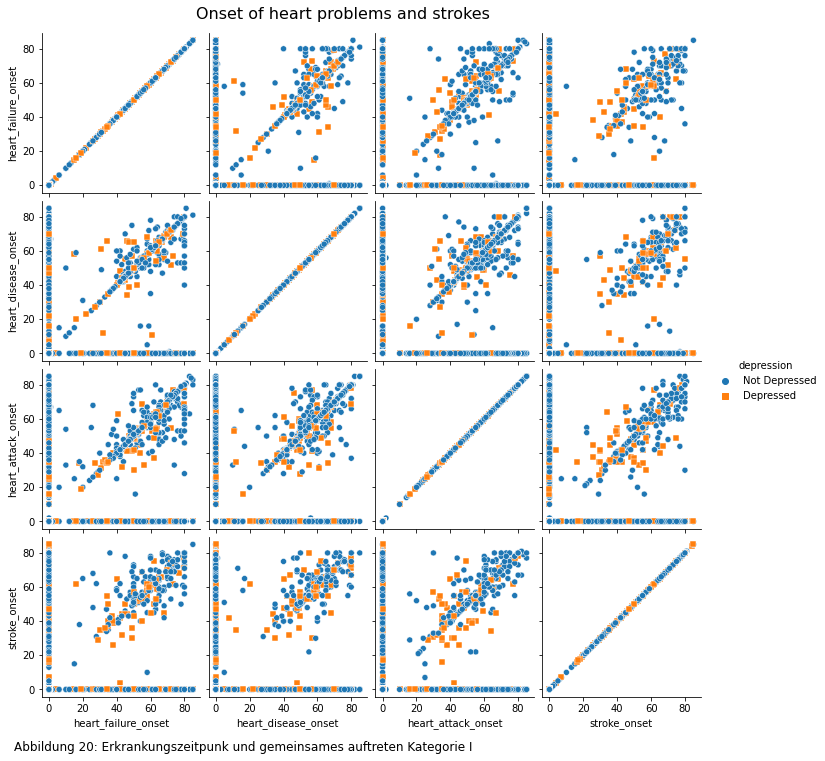

In [3]:
heart_onsets = ["heart_failure_onset", "heart_disease_onset", "heart_attack_onset", "stroke_onset"]

grid = sns.pairplot(df[heart_onsets + ["depression"]], hue="depression", markers=['o', 's'], diag_kind=None )

grid.axes[0][0].set_title("Onset of heart problems and strokes", y=1.05, x=1.9, fontsize=16)
grid.fig.suptitle("Abbildung 20: Erkrankungszeitpunk und gemeinsames auftreten Kategorie I", y=0, x=0.3, fontsize=12)

plt.draw()

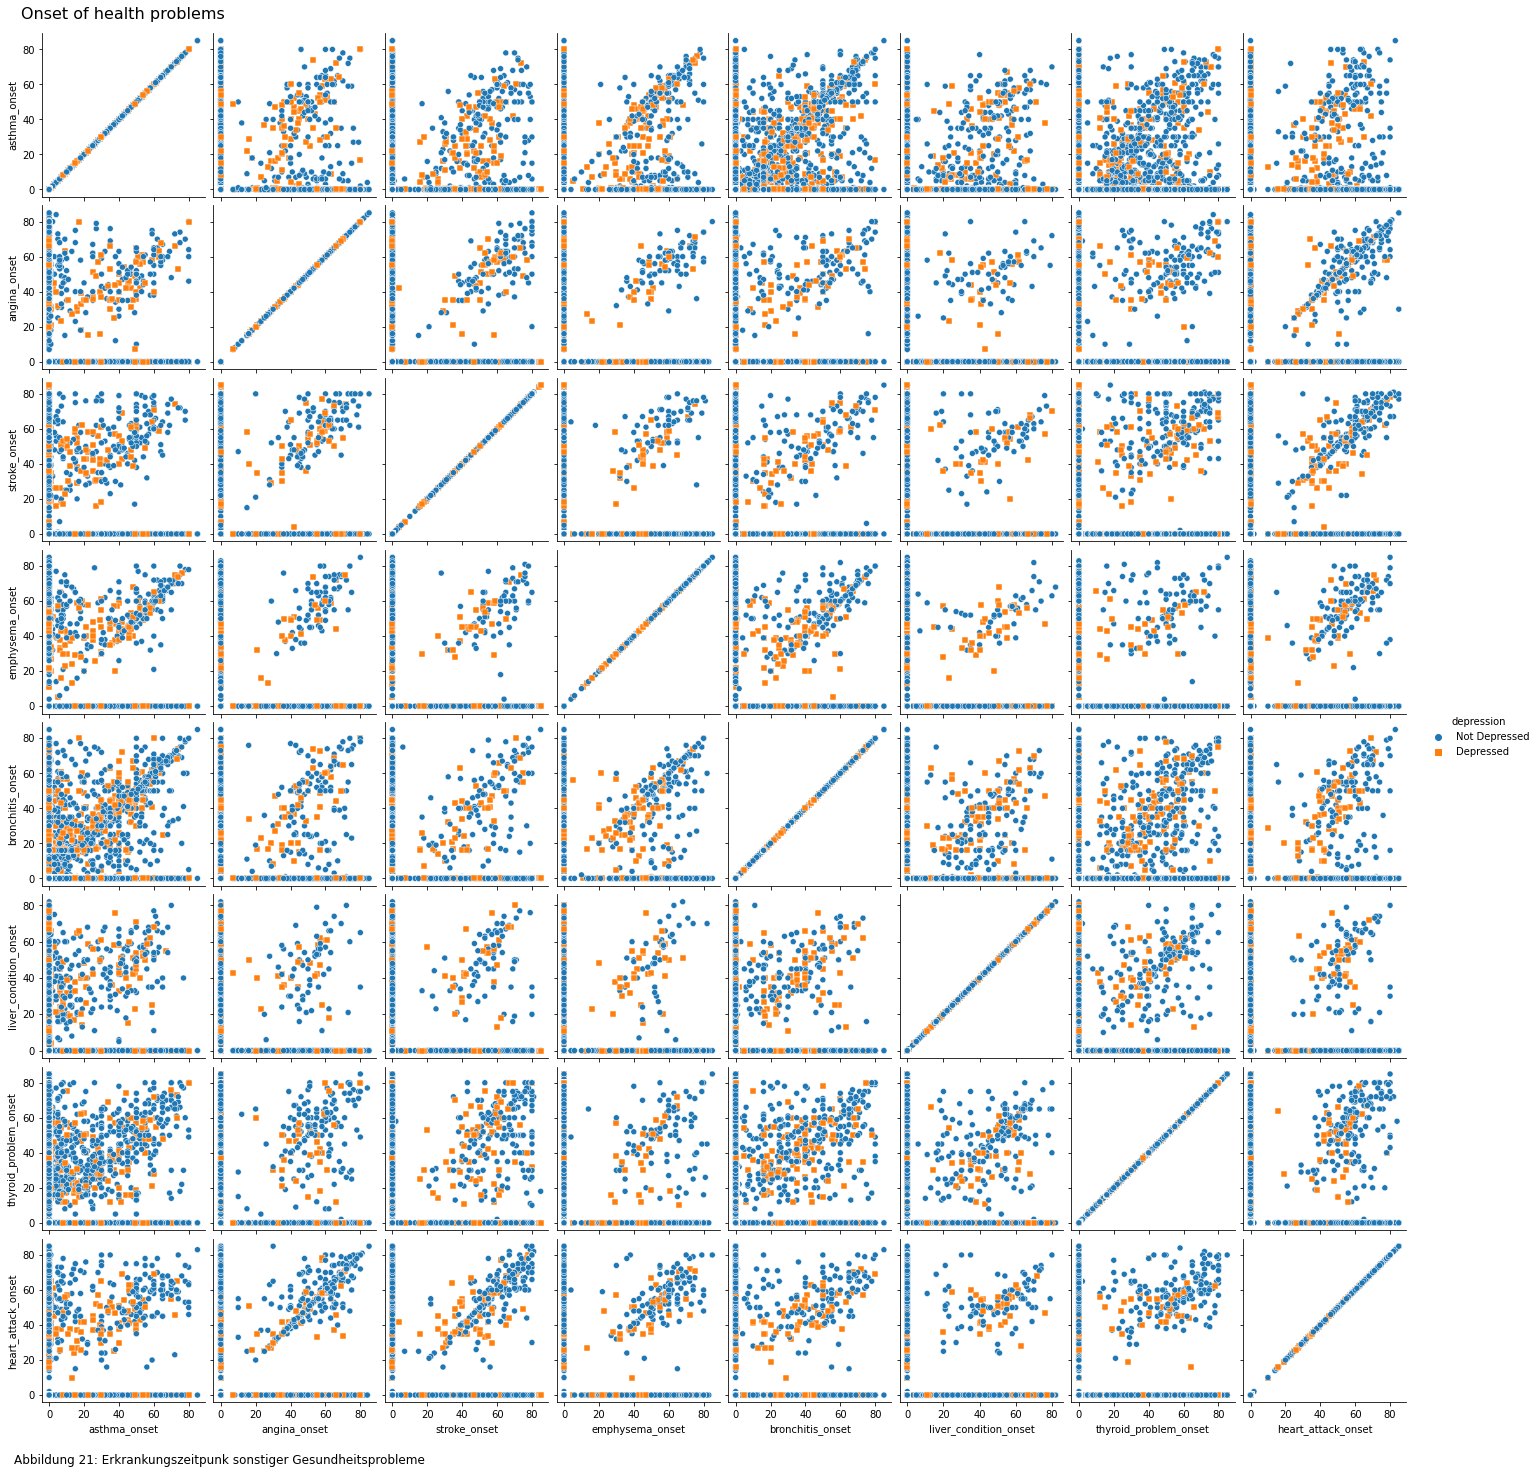

In [4]:
# get onset columns on basis of names (must end with _onset) 
# filter not used columns
onset_columns = [col for col in df.columns 
                if col.endswith("_onset") and "cancer" not in col 
                and "arthritis" not in col and "heart" not in col]

# Add one column for heart problem and label
onset_columns.append("heart_attack_onset")
onset_columns.append("depression")

grid = sns.pairplot(df[onset_columns], hue="depression", markers=['o', 's'], diag_kind=None )

# Add titles
grid.axes[0][0].set_title("Onset of health problems", y=1.05, x=0.5, fontsize=16)
grid.fig.suptitle("Abbildung 21: Erkrankungszeitpunk sonstiger Gesundheitsprobleme", y=0, x=0.15, fontsize=12)

plt.draw()

Es fällt auf, dass depressive Menschen häufig früher und da die depressiven Punkte, trotz eines Anteils von 9%, sehr deutlich in der Mitte der Grafiken in Abbildung 21 zu sehen sind, häufig kombiniert an Krankheiten leiden. 

In [ ]:
df.plot_binary_columns(["heart_attack_relative", "asthma_relative", "diabetes_relative"], 
                        title="Percent of depressed/not depressed has relatives with health problem", 
                        suptitle="Abbildung 22: Verwandte mit Gesundheitsproblemen").draw()

Auch bei Erkrankungen von Verwandten wird in Abbildung 22 sichtbar, dass Depressive in einem größeren Anteil kranke Verwandte haben. Hier ist nicht auszuschließen, dass sich die Krankheit auch auf die Person vererbt haben könnte [[16](#tumunich1998)] und daher ähnliche Werte zu sehen sind. 

Als letztes sollen die Attribute zu Drogenkonsum in der Kategorie II betrachtet werden. 

In [ ]:
drug_col = [col for col in df.columns if col.endswith("_use")]

df.plot_binary_columns(drug_col, 
                        title="Percent of depressed/not depressed has relatives with health problem", 
                        suptitle="Abbildung 23: Anteil mindestens einmal harte Drogen konsumiert").draw()

In [ ]:
import matplotlib.gridspec as grd

gs = grd.GridSpec(3, 1)

DepressedDataFrame(data=df[df["meth_per_month"]!=0]).depression_hist("meth_per_month", title="Meth per month")
DepressedDataFrame(data=df[df["heronine_per_month"]!=0]).depression_hist("heronine_per_month", title="Heronine per month")
DepressedDataFrame(data=df[df["cocaine_per_month"]!=0]).depression_hist("cocaine_per_month", title="Cocaine per month")
DepressedDataFrame(data=df[df["marijuana_per_month"]!=0]).depression_hist("marijuana_per_month", 
                                                                          title="Marijuana per month", 
                                                                          suptitle="Abbildung 23: Harte Drogen pro Monat")

plt.draw()


In Abbildung 22 ist der Drogenkonsum von Depressiven und nicht Depressiven dargestellt. Dabei haben anteilig depressive Menschen mehr harte Drogen als nicht depressive Menschen mindestens einmal konsumiert. In Abbildung 23 ist die Anzahl des Konsums pro Monat dargestellt. Vor allem bei dem Heroin- und Methkonsum fallen Unterschiede auf. Heroin wird von nicht depressiven Menschen häufiger täglich konsumiert. Meth hingegen wird im Vergleich im Gesamten häufiger als einmal die Woche von depressiven Menschen konsumiert. 

Zum Ende der explorativen Datenanalyse werden nun leichte Drogen, wie Alkoholkonsum und Zigarettenkonsum betrachtet.


In [ ]:
df.depression_hist("drinks_per_occasion", title="Drinks per occasion")
DepressedDataFrame(
    data=df[df["previous_cigarettes_per_day"]!=0]).depression_hist(
                "previous_cigarettes_per_day", title="Previous cigarettes per day")
DepressedDataFrame(
    data=df[df["current_cigarettes_per_day"]!=0]).depression_hist(
                                    "current_cigarettes_per_day", 
                                    title="Current cigarettes per day", 
                                    suptitle="Abbildung 24: Zigarretten und Alkoholkonsum am Tag/bei Gelegenheit")

plt.draw()

Abbildung 24 zeigt die Verteilung von alkoholischen Getränken, die durchschnittlich am Stück getrunken werden. Sowie den täglichen Zigarettenkonsum bei aktiven Rauchern und der frühere Zigarettenkonsum bei ehemaligen Rauchern. Hierbei sind keine bedeutenden Unterschiede zu sehen. 

Die Analyse der Kategorie II hat ergeben, dass nur die Arthritisart nicht verwendet werden kann, da es keine bedeutenden Unterschiede gibt. Auch wenn der Konsum der leichten Drogen sich nicht besonders in den Gruppen unterscheidet, sollte dieses Feature genutzt werden und der Machine Learning (ML) Algorithmus soll selbst bewerten, ob das Attribut zur Erkennung von Depression hilfreich ist.


### 2.2 Training<a class="anchor" id="training"></a>
In diesem Kapitel sollen Modelle Trainiert werden und deren Qualität bewertet werden. Zuerst soll dabei das Vorgehen erklärt werden und im Anschluss wird validiert, ob eine Ausreichende Modellgüte mit den Daten erreicht werden kann. Ist dies der fall, wird das Training in Kategorie I und Kategorie II vorgenommen. Am Ende des Kapitels werden die Ergebnisse der Modelle erklärt. 

#### 2.2.1 Vorgehen für das Trainieren des Machine Learning Modell<a class="anchor" id="vorgehen"></a>
Im Folgenden werden die ML-Modelle trainiert, um Depression vorherzusagen. Dabei soll, bevor Modelle in Kategorie I und Kategorie II trainiert werden, versucht werden ein Modell zu erreichen, dass eine bessere Vorhersage erreicht als beim Raten. Zur Bewertung der Modelle soll hierbei der Wert Accuracy genutzt werden, der 1 entspricht, wenn für alle Zeilen die Klasse (Depression) richtig vorhergesagt wurde und 0 ist, wenn keine Vorhersage richtig getroffen wurde [[17](#sklearn2022a)]. Dabei soll ein besserer Wert erreicht werden, als wenn Menschen die Depression erkennen wollen, raten würden. Würde der Mensch annehmen, dass alle Menschen nicht depressiv wären, würde eine Accuracy von 91.26% (prozentualer Anteil nicht depressiver Personen) in dem Datensatz erreicht werden.  

Sollte dieser Ansatz eine ausreichende Performanz erreichen, sollen erst nur Modelle mit den Attributen der Kategorie I trainiert werden. Dabei sollen die relevanten Features über die Gewichte in den Modellen bestimmt werden, da einige Features der Kategorie I in der explorativen Datenanalyse keine besondere Unterscheidung zwischen den Klassen gezeigt haben. Jedoch sollen folgende Features ignoriert werden, weil diese zu wenige Angaben enthalten und sonst die Datenbasis zu stark einschränken würden, wenn diese Entfernt würden:
- first_cancer_type
- second_cancer_type
- full_time_work
- lifetime_alcohol_consumption

Kategorie II sollen die Modelle mit allen möglichen Kombinationen der Features errechnet werden, da für eine technische Unterstützung alle weiteren Angaben zur Person, die bekannt sind, verarbeitet werden können. Jedoch sollte immer das beste Modell genutzt werden, auch wenn es weniger Daten nutzt als angegeben werden.  Jedoch wird die Berechnung nicht durchgeführt, wenn in Kategorie I kein akzeptabler Wert erreicht wurde, da sonst die Attribute der Kategorie II das Modell zwar verbessern könnten, aber keine ausreichende Akzeptanz für das Tool geschaffen werden könnte, wenn mit den dem Menschen normalerweise bekannten Eigenschaften der Menschen im Umfeld keine Vorhersage möglich wäre.   


Zur Auswahl der ML-Methoden wird die in der scikit learn Dokumentation vorhandene Machine Learning Map genutzt [[18](#sklearn2022b)]. 

<div>
    <img src="./pictures/ml_map.png" width="75%"/>
    <figcaption><a href="https://scikit-learn.org/stable/tutorial/machine_learning_map/">Abbildung 25:</a> Machine Learning Map</figcaption>
</div>

Entsprechend der Abbildung 25 existieren mehr als 50 Zeilen, weshalb ML genutzt werden kann. Zudem handelt es sich um ein Problem bei dem benannte Kategorien (depressiv und nicht depressiv) vorhergesagt werden müssen und damit liegt ein Klassifikationsproblem vor. Ungefiltert hat der Datensatz 36259 Zeilen, weshalb zuerst ein Lineare Support Vector Cassifier (SVC) genutzt werden soll. SVC können für die Klassifikation von binären und mehr Klassen genutzt mit hoher Performanz in mehreren Dimensionen genutzt werden und unterteilen dafür den Raum in unterschiedliche Teile um dann alle in diesem Raum befindlichen Objekte der Klasse hinzuzufügen [[19](#sklearn2022c)]. Abbildung 26 zeigt diese Unterteilung bei linearen SVC und nicht linearen SVC. Letztere kommen als letztes zum Einsatz, wenn alle anderen Verfahren nicht funktioniert haben. 


<div>
    <img src="./pictures/sphx_glr_plot_iris_svc_001.png" width="50%"/>
    <figcaption><a href="https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_001.png">Abbildung 26:</a> Funktionsweise von SVC</figcaption>
</div>

Die Daten müssen der Funktion als Array übergeben werden. Dafür werden numerische Werte wie Haushaltsgrößer, durchschnittliche Stunden Schlaf pro Tag mittels des `MinMaxScaler`s in Werte zwischen 0 und 1 transformiert, sodass die Modelle besser damit arbeiten können [[20](#sklearn2022d)]. Kategoriale Werte müssen auf Zahlen gemappt werden, damit die Algorithmen damit rechnen können. Handelt es sich bereits um die Zahlen 1 für ja und 0 für nein, muss keine Transformation vorgenommen werden. Bei den anderen Klassen müssen die Zeilen mit den Werten für fehlende Angaben (Missing, None) entfernt werden, bevor diese umgewandelt werden. Für diese Umwandlung wird der `MultiLabelBinarizer` genutzt [[21](#sklearn2022e)]. Für das Encodieren der Labels wird der `LabelEncoder` genutzt [[22](#sklearn2022f)].

Für das Training der Modelle müssen Hyperparameter übergeben werden. Hyperparameter sind Parameter, die das Modell nicht selbst lernen kann; beispielsweise C, Kernal und gamma für den SVC [[23](#sklearn2022g)]. Um diese Parameter sinnvoll bestimmen zu können werden verschiedene Werte mit Hilfe der Klasse `GridSearchCV` genutzt, die die Classifier trainiert und miteinander vergleicht [[24](#sklearn2022h)]. 



#### 2.2.2 Überprüfung der zu erreichenden Modellgüte mit den Daten<a class="anchor" id="trainingK2"></a>
Um die beste Accurancy zu erreichen, sollten möglichst viele Daten in das Modell aufgenommen werden, da Aufgrund von Overfitting die Muster in den Daten am besten gelernt werden können. Gleichzeitig werden die Daten aber in Trainings- und Testdaten unterteilt, da sonst keine Beurteilung der Performanz auf neuen Daten bewertet werden könne, was das Ziel unseres Trainings ist. [[25](#diettrich1995)]

Damit sollen alle Attribute von Kategorie I und Kategorie II genutzt werden und ein Modell errechnet werden.  

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from depressionml.classification.classifier import DepressedClassifier
from depressionml.classification.helper import train_grid_search, get_all_combinations

import pickle
import os

In [ ]:
# all columns of category II
# scaler will be handled with MinMaxScaler
scaler_columns = ["age", "BMI", "asthma_onset", "arthritis_onset", "heart_failure_onset", "heart_disease_onset", 
    "angina_onset", "heart_attack_onset", "stroke_onset", "emphysema_onset", "bronchitis_onset",
    "liver_condition_onset", "thyroid_problem_onset", "cancer_onset", "sleep_hours"]

# Already binary 0/1
keep_columns = ["gender","asthma", "asthma_currently", "ever_overweight", "cancer", "cant_work", "rehab_program", 
    "heart_disease", "heart_attack", "stroke", "heart_failure", "anemia", "blood_transfusion", "arthritis", 
    "angina", "asthma_emergency", "emphysema", "bronchitis", "liver_condition", "thyroid_problem", "bronchitis_currently", 
    "liver_condition_currently", "thyroid_problem_currently", "heart_attack_relative", "asthma_relative", "diabetes_relative", 
    "hay_fever", "trouble_sleeping_history", "memory_problems", 'health_problem_Other Impairment', 
    'health_problem_Bone or Joint', 'health_problem_Weight', 'health_problem_Back or Neck', 'health_problem_Arthritis', 
    'health_problem_Cancer', 'health_problem_Other Injury', 'health_problem_Breathing', 'health_problem_Stroke', 
    'health_problem_Blood Pressure', 'health_problem_Mental Retardation', 'health_problem_Hearing', 'health_problem_Heart', 
    'health_problem_Vision', 'health_problem_Diabetes', 'health_problem_Birth Defect', 
    'health_problem_Senility', 'health_problem_Other Developmental']

# Categories will be handled with MultiLabelBinarizer
binarizer_columns = ["marital_status", "work_type", "out_of_work", "vigorous_recreation", "moderate_recreation"]

dclf = DepressedClassifier(LinearSVC, 
        data=df, 
        scaler_columns=scaler_columns, 
        binarizer_columns=binarizer_columns, 
        keep_columns=keep_columns, 
        remove_values=[], 
        classifier_kwargs={"dual": True})

hyper_params = {"C": [i/10 for i in range(1, 20, 2)]}

clf = train_grid_search(dclf, hyper_params, restore_path="./models/linearSVC_2_2_2_hyperparameter.p")
pd.DataFrame(clf.cv_results_).sort_values(by=['rank_test_score']).head()

In [ ]:
print(clf.best_estimator_)
clf.best_estimator_.plot(
    title="Confusion Matrix LinearSVC all", 
    suptitle="Abbildung 27: Confusion Matrix LinearSVC Hyperparameter").draw()

Die Accuracy des Modells ist mit 91.86% etwas besser als die Zielgröße von 91.26%. Jedoch sollte schon mit der Großzahl der Features die Accuracy eindeutig besser sein. Betrachtet man zudem noch Abbildung 27, sieht man, dass die in den Testdaten richtig erkannten depressiven Menschen mit 84 sehr gering lag und nicht als depressiv erkannte Menschen, die aber eigentlich depressiv sind mit 535 hoch liegt. Die Anzahl der Menschen, die als depressiv erkannt wurden, es in Wirklichkeit nicht sind, liegt mit 56 recht gering und ist auch nicht so kritisch wie depressive Menschen nicht als diese zu erkennen, um ihnen zu helfen zu können.  

Um das Modell verbessern zu können, werden nun Attribute herausgesucht, die ggf. keinen großen Einfluss in der Gewichtung hatten und zu einer besseren Generalisierung im Wege standen. Dafür sollen Modelle mit allen Kombinationsmöglichkeiten der Daten, die bei der explorativen Datenanalyse als gegebenenfalls hilfreich mit allen anderen Kombiniert angezeigt werden. Da die erste Berechnung ergeben hat, dass kleine Parameter für C ein besseres Ergebnis erzielen, wird nur noch mit die Werte 0.1, 0.2 und 0.3 trainiert.


In [ ]:
binary_combinations = get_all_combinations(["lifetime_alcohol_consumption", "arthritis_type"], 
                         binarizer_columns)
scaler_combinations = get_all_combinations([["household_size", "household_smokers"], 
                          ["drinks_per_occasion", 'marijuana_per_month', 'cocaine_per_month', 
                           'heronine_per_month', 'meth_per_month', "start_smoking_age", 
                           "previous_cigarettes_per_day", "current_cigarettes_per_day"]], 
                         scaler_columns, flattern=True)
keep_combinations = get_all_combinations([['marijuana_use', 'cocaine_use', 'heroine_use', 'meth_use']], 
                         scaler_columns, flattern=True)

print(binary_combinations)

In [ ]:
dclf = DepressedClassifier(LinearSVC, 
        data=df, 
        scaler_columns=scaler_columns, 
        binarizer_columns=binarizer_columns, 
        keep_columns=keep_columns, 
        remove_values=[], 
        classifier_kwargs={"dual": False})


# To save processing time, just use one column. 
# We just try to figure out if we can improve the models accuracy
hyper_params = {
    #"binarizer_columns": binary_combinations,
    #"keep_columns": keep_combinations,
    "scaler_columns": scaler_combinations,
    "C": [0.1, 0.2, 0.3]
}


clf = train_grid_search(dclf, hyper_params, restore_path="./models/linearSVC_2_2_2_column_combinations.p")

pd.DataFrame(clf.cv_results_).sort_values(by=['rank_test_score']).head(3)

In [ ]:
print(clf.best_estimator_)
clf.best_estimator_.plot(title="Confusion Matrix LinearSVC selective features", 
                         suptitle="Abbildung 28: Confusion Matrix SVC Parameter").draw()

Abbildung 28 zeigt im Vergleich zu Abbildung 27, dass mehr depressive Menschen erkannt wurden, jedoch ist die Erkennung noch immer nicht ausreichend, da 529 depressive Menschen nicht erkannt wurden.

Die Accuracy lässt sich durch die Variation der Parameter weiter verbessern. Die weitere Überprüfung der Verbesserung der Modelle soll nun in Kategorie I stattfinden, damit sichergestellt werden kann, dass wenige Attribute auch ausreichend sind.

#### 2.2.3 Modell für Attribute der Kategorie I<a class="anchor" id="trainingK1"></a>
Da die Werte sich bereits verbessern, soll nun versucht werden mit den Werten der Kategorie I ein Modell zu erstellen, dass den Ansprüchen an die Modellgüte entspricht.  
Die Parameter werden dafür in Gruppen eingeteilt, die thematisch zusammengehören. Beispielsweise Haushaltsgröße und Anzahl der Raucher im Haushalt, da sich beide Attribute auf den Haushalt beziehen.


In [ ]:
# Columns of category I
scaler_columns_k1 = ["age", "household_size", "household_smokers"]
binarizer_columns_k1 = ["gender", "marital_status", "vigorous_recreation", "moderate_recreation", 
                        "full_time_work", "work_type", "out_of_work"]
keep_columns_k1 = ["asthma", "asthma_currently", "ever_overweight", "cancer", "cant_work", "heart_disease", "heart_attack", "heart_failure"]

# Groupes of columns in which they should be tried to be calculated
scaler_columns_k1_grouped = [["age"], ["household_size", "household_smokers"]]
binarizer_columns_k1_grouped = [["gender", "marital_status"], 
                                ["vigorous_recreation", "moderate_recreation"], 
                                ["full_time_work", "work_type", "out_of_work"]]
keep_columns_k1_grouped = [["asthma", "asthma_currently", "ever_overweight", "cancer"], 
                           ["cant_work"], 
                           ["heart_disease", "heart_attack", "heart_failure"]]


In [ ]:
dclf = DepressedClassifier(LinearSVC, 
        data=df, 
        scaler_columns=scaler_columns_k1, 
        binarizer_columns=binarizer_columns_k1, 
        keep_columns=keep_columns_k1, 
        remove_values=[], 
        classifier_kwargs={"dual":False, "C":0.1})

hyper_params = {
    "binarizer_columns": get_all_combinations(binarizer_columns_k1_grouped, flattern=True, keep_empty=True),
    "keep_columns": get_all_combinations(keep_columns_k1_grouped, flattern=True, keep_empty=True),
    "scaler_columns": get_all_combinations(scaler_columns_k1_grouped, keep_empty=True),
    "remove_values": [[], ["None", "Missing"]]
}

clf = train_grid_search(dclf, hyper_params, restore_path="./models/linearSVC_2_2_3_column_combinations.p")


In [ ]:
print(pd.DataFrame(clf.cv_results_).sort_values(by=['rank_test_score']).reset_index()["params"][0])
print(clf.best_estimator_)
clf.best_estimator_.plot(title="Linear SVC in Category I selective features", 
                         suptitle="Abbildung 27: Confusion Matrix LinearSVC Kategorie I").draw()
pd.DataFrame(clf.cv_results_).sort_values(by=['rank_test_score']).head()

Die Kalkulation der Modelle mit den verschiedenen gruppierten Spalten der Kategorie I hat mit dem `LinearSVC` keine brauchbaren Erkenntnisse erzielt, da wie man in Abbildung 27 erkennen kann keine depressiven Menschen erkannt wurden. Das Modell hat immer nicht depressiv vorhergesagt.

Damit scheint der Classifier `LinearSVC` nicht für die Daten geeignet zu sein. Unter Beachtung der Abbildung 25 wird deshalb der `KNeighborsClassifier` ausprobiert. Dieser Classifier grenzt die Klassen über die nächsten benachbarten Punkte zu jedem Ausgangspunkt ab. Dabei sollten die Anzahl der Nachbarn (k) und die Gewichtung der Nachbarn (weights) als Hyperparameter verändert werden. Als Gewichtung werden die Standfunktionen (`distance` und `uniform`) der Klasse `KNeighborsClassifier` genutzt. [[26](#sklearn2022i), [27](#sklearn2022j)]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
dclf = DepressedClassifier(KNeighborsClassifier, 
        data=df, 
        scaler_columns=scaler_columns_k1, 
        binarizer_columns=binarizer_columns_k1, 
        keep_columns=keep_columns_k1, 
        remove_values=[], 
        classifier_kwargs={})

hyper_params = {
    "weights": ["uniform", "distance"],
    "n_neighbors": [3, 5, 8, 10]
}

clf = train_grid_search(dclf, hyper_params, restore_path="./models/kNeighborsClassifier_2_2_3_hyperparameter.p")

In [ ]:
print(clf.best_estimator_)
clf.best_estimator_.plot(title="Confusion Matrix KNeighbour selective features", 
                         suptitle="Abbildung 28: Confusion Matrix Kneighbor all parameter").draw()
pd.DataFrame(clf.cv_results_).sort_values(by=['rank_test_score']).head()

Die Accuracy ist schlechter als bei `LinearSVC` und damit auch schlechter als würde nur auf nicht depressiv getippt werden. Jedoch ist Abbildung 28 eine Verbesserung zu erkennen, denn es werden Depressive erkannt.  
Deswegen soll nun die letzte Stufe (`SVC`) der Abbildung 25 getestet werden und verglichen werden, ob damit bessere Ergebnisse erreicht werden, mit denen man fortfahren könnte. Dieser Algorithmus und die Hyperparameter wurden bereits erklärt.


In [ ]:
from sklearn.svm import SVC

In [ ]:
dclf = DepressedClassifier(SVC, 
        data=df, 
        scaler_columns=scaler_columns_k1, 
        binarizer_columns=binarizer_columns_k1, 
        keep_columns=keep_columns_k1, 
        remove_values=[], 
        classifier_kwargs={})

hyper_params = {
    "C": [0.1, 0.5, 1., 1.5],
    "kernel": ["poly", "rbf", "sigmoid", "precomputed"]
}


clf = train_grid_search(dclf, hyper_params, restore_path="./models/svc_2_2_3_hyperparameters.p")



In [ ]:
print(clf.best_estimator_)
clf.best_estimator_.plot(title="Confusion Matrix SVC Category I", 
                         suptitle="Abbildung 29: Confusion Matrix SVC in Kategorie I").draw()
pd.DataFrame(clf.cv_results_).sort_values(by=['rank_test_score']).head()

Die Berechnung mit SVC hat auch bei nichtlinearer Anwendung zu keiner Erkennung von Depression geführt. 
Depression kann mit den Werten aus Kategorie I nicht erkannt werden, weil zu viele Beispiele für nicht depressive Menschen in dem Datensatz. 

Nun soll versucht werden einen Datensatz über `sample` ein ausgeglichener Datensatz erstellt werden. Damit in den Teildatensätzen immer gleich viele depressive und nicht depressive Menschen enthalten sind, damit das ML-Modell nicht von der ungleichmäßig verteilten Datenmenge in den Labels beeinflusst wird. Da es aktuell nicht zu bewerten ist, wie die Modelle bei nicht verzerrten Daten performen, müssen alle Modelle nochmal mit den Sampledaten durchgerechnet werden und verglichen werden, bevor das finale Modell in Kategorie I errechnet werden kann.

In [ ]:
number_of_depressed = len(df[df["depression"]=="Depressed"])

# build new data with sample
data_list = [
    pd.concat(
        [df[df["depression"]=="Not Depressed"].sample(number_of_depressed, random_state=i), # get random not depressed
        df[df["depression"]=="Depressed"]]).sample(number_of_depressed*2, random_state=i+5) # merge and sample for 
    for i in range(7, 12, 1)]                                                               # diffrent distribution 

print(len(data_list))
print(len(data_list[0]))

In [ ]:
dclf = DepressedClassifier(LinearSVC, 
        data=df, 
        scaler_columns=scaler_columns_k1, 
        binarizer_columns=binarizer_columns_k1, 
        keep_columns=keep_columns_k1, 
        remove_values=[], 
        classifier_kwargs={"C": 0.1, "dual": False})

hyper_params = {
    "data": data_list
}

clf = train_grid_search(dclf, hyper_params, restore_path="./models/linearSVC_2_2_3_sampled.p")

In [ ]:
print(clf.best_estimator_)
clf.best_estimator_.plot(title="Confusion Matrix LinearSVC Category I sampled data", 
                         suptitle="Abbildung 30: Confusion Matrix LinearSVC mit ausgeglichenen Samples").draw()
pd.DataFrame(clf.cv_results_).sort_values(by=['rank_test_score']).head()

In [ ]:
dclf = DepressedClassifier(KNeighborsClassifier, 
        data=df, 
        scaler_columns=scaler_columns_k1, 
        binarizer_columns=binarizer_columns_k1, 
        keep_columns=keep_columns_k1, 
        remove_values=[], 
        classifier_kwargs={})

hyper_params = {
    "data": data_list,
    "weights": ["uniform", "distance"],
    "n_neighbors": [3, 5, 8, 10]
}


clf = train_grid_search(dclf, hyper_params, restore_path="./models/kNeighborsClassifier_2_2_3_sampled.p")

In [ ]:
print(clf.best_estimator_)
clf.best_estimator_.plot(title="Confusion Matrix KNeighborsClassifier Category I sampled data", 
                         suptitle="Abbildung 31: Confusion Matrix KNeighborsClassifier ausgeglichene Samples").draw()
pd.DataFrame(clf.cv_results_).sort_values(by=['rank_test_score']).head()

Wie in den Tabellen zu erkennen ist, hat KNeighbours eine geringere Accuracy als LinearSVC. Zudem zeigt Abbildung 31, dass weniger depressive Menschen richtig erkannt wurden.  

Zuletzt soll die Klassifizierung mit SVC und den ausgeglichenen Daten durchgeführt werden. 

In [ ]:
dclf = DepressedClassifier(SVC, 
        data=df, 
        scaler_columns=scaler_columns_k1, 
        binarizer_columns=binarizer_columns_k1, 
        keep_columns=keep_columns_k1, 
        remove_values=[], 
        classifier_kwargs={})

hyper_params = {
    "C": [0.1, 0.3, 0.5, 1.],
    "kernel": ["poly", "rbf", "sigmoid", "precomputed"],
    "data": data_list
}

clf = train_grid_search(dclf, hyper_params, restore_path="./models/svc_2_2_3_sampled.p")

In [ ]:
print(clf.best_estimator_)
clf.best_estimator_.plot(title="Confusion Matrix SVC Category I sampled data", 
                         suptitle="Abbildung 32: Confusion Matrix SVC mit ausgeglichenen Daten").draw()
pd.DataFrame(clf.cv_results_).sort_values(by=['rank_test_score']).head()

Die nicht linearen SVC-Modelle haben eine minimal besser von Accuracy (72,0%) erreicht als die linearen SVC-Modelle (71,6%), jedoch wurden weniger depressive Menschen als solche erkannt - 422 von 630 in den Testdaten im Vergleich zu 424 von 630 (siehe Abbildung 30 und Abbildung 32). `LinearSVG` erkennt die meisten depressiven Menschen, die auch wirklich depressiv sind. Aus diesem Grund und da die Berechnungsgeschwindigkeit bei linearen SVC viel geringer ist als bei nicht Linearen und diese vor allem bei der Berechnung aller Kombinationen in Kategorie II einen großen Unterschied machen könnte, wird der letzte Versuch mit der Variation der Daten mittels `LinearSVG` umgesetzt. Zur schnelleren Berechnung soll nur noch der beste `DataFrame`, von dem `LinearSVG`-Modell genutzt werden.

In [ ]:
# restore model
clf = train_grid_search(dclf, hyper_params, restore_path="./models/linearSVC_2_2_3_sampled.p")

# extract best estimator param (sorted by rank_test_score first row, col 4)
best_df_linear_svc = pd.DataFrame(pd.DataFrame(clf.cv_results_).sort_values(by=['rank_test_score']).iloc[0, 4])
best_df_linear_svc.head()

In [ ]:
dclf = DepressedClassifier(LinearSVC, 
        data=best_df_linear_svc, 
        scaler_columns=scaler_columns_k1, 
        binarizer_columns=binarizer_columns_k1, 
        keep_columns=keep_columns_k1, 
        remove_values=[], 
        classifier_kwargs={"C": 0.1, "dual": False})

hyper_params = {
    "binarizer_columns": get_all_combinations(binarizer_columns_k1_grouped, flattern=True, keep_empty=True),
    "keep_columns": get_all_combinations(keep_columns_k1_grouped, flattern=True, keep_empty=True),
    "scaler_columns": get_all_combinations(scaler_columns_k1_grouped, flattern=True, keep_empty=True),
    "remove_values": [["None", "Missing"], []]
}


clf = train_grid_search(dclf, hyper_params, restore_path="./models/linearSVC_2_2_3_final.p")

In [ ]:
print(clf.best_estimator_)
clf.best_estimator_.plot(title="Confusion Matrix best result Category I",
                         suptitle="Abbildung 33: Confusion Matrix LinearSVC Kategorie I - Finales Ergebnis").draw()
pd.DataFrame(clf.cv_results_).sort_values(by=['rank_test_score']).head()

In [ ]:
df_result = pd.DataFrame(clf.cv_results_).sort_values(by=['rank_test_score'])
print(f'binarizer_columns:\t{df_result.iloc[0, 4]}')
print(f'Keep columns: \t\t{df_result.iloc[0, 6]}')
print(f'Scaler columns: \t{df_result.iloc[0, 7]}')


Das beste Ergebnis, wurde mit dem `LinearSVC` und den Attributen über diesem Text notierten Spalten erreicht. Dabei ist das bessere Ergebnis erreicht worden, wenn die Werte Missing und None in den multikategorialen Spalten (`binarizer_columns`) nicht entfernt wurden. Für den `LinearSVC` wurde der Hyperparameter `C` auf 0,1 als bester Wert gefunden.  
Das beste Modell hat eine Accuracy von 73.18% und ist damit im Vergleich zu den Modellen auf den Gesamtdaten schlechter. Jedoch werden bedeutend mehr depressive Menschen als solche erkannt. 213 depressive Menschen wurden von 306 in den Testdaten erkannt. Zudem hat das Modell 67 Menschen ohne Depression als erkrankte Menschen vorhergesagt. 

Nähere Betrachtung der Gewichtungen der Spalten. Diese werden in der Klasse wie folge bearbeitet:
1. Binary Spalten:
   1. Reihenfolge bleibt gleich zu der wie sie übergeben werden
   2. Jede Category in der Spalte erhält eine eigene Spalte.
2. Scaler Spalten: Jede spalte bleibt als eine Spalte bestehen in gleicher Reihenfolge
3. Keep Spalten: Jede Spalte bleibt als eine Spalte mit bestehender Reihenfolge

In [ ]:
feature_list = []
for i, binarizer in enumerate(clf.best_estimator_.binarizer_list):
    feature_list += [f"{b}_{df_result.iloc[0, 4][i]}" for b in binarizer.classes_]

feature_list += [scaler_col for scaler_col in df_result.iloc[0, 7]]
feature_list += [keeper_col for keeper_col in df_result.iloc[0, 5]]
    
clf.best_estimator_.clf.coef_

df_results = pd.DataFrame({"Feature": feature_list, "Coef": clf.best_estimator_.clf.coef_[0]})
df_results.sort_values(by="Coef")

Dementsprechend sind die Attribute mit dem höchsten Einfluss auf Depressionserkennung innerhalb der Kategorie I.

Die Nutzung der Modelle erfolgt indem ein `dict`, dass in einer Schnittstelle als JSON übergeben wird, an das Modell übergeben wird und dieses die Attribute mit denen trainiert wurde extrahiert und eine Vorhersage der Klassen in für Menschen lesbarer Form zurückgibt.  

In [ ]:
best_df_linear_svc

In [ ]:
# restore best estimator for depression
dclf = DepressedClassifier(LinearSVC, 
        data=best_df_linear_svc, 
        scaler_columns=scaler_columns_k1, 
        binarizer_columns=binarizer_columns_k1, 
        keep_columns=keep_columns_k1, 
        remove_values=[], 
        classifier_kwargs={"C": 0.1, "dual": False})

dclf.fit(dclf.train_vec, dclf.train_labels)

# JSON / dict to predict
to_pred = {
    "age": 28, 
    "household_size": 1, 
    "household_smokers": 1, 
    "gender": ["male"], 
    "marital_status": "Missing", 
    "vigorous_recreation": "Yes", 
    "moderate_recreation": "No", 
    "full_time_work": "Yes", 
    "work_type": "Private Wage Worker", 
    "out_of_work": "Missing",
    "asthma": 0, 
    "asthma_currently": 0, 
    "ever_overweight": 0, 
    "cancer": 0, 
    "cant_work": 0, 
    "heart_disease": 0, 
    "heart_attack": 0, 
    "heart_failure": 0
}


dclf.predict_one(**to_pred)

In [ ]:
df["out_of_work"].unique()

Dadurch könnte eine Liste an Modellen durchlaufen werden, die nach der besten Accuracy sortiert sind, und die vorhanden Daten in das Modell gegeben werden. In der Liste sollte das beste Modell der Kategorie I sein und alle Modelle der Kategorie II.  

Da aber das beste Modell der Kategorie I nicht mit ausreichender Qualität die Modelle erkannt hat, um bei den Nutzern eine Akzeptanz zu erreichen, sollten andere Daten mit denen eine bessere Vorhersage erreicht werden kann gesucht werden, um das Tool bereitzustellen. 

# 3 Fazit<a class="anchor" id="fazit"></a>
In der vorliegenden Arbeit wurde anhand eines öffentlich verfügbaren Datensatzes zu Depression eine explorative Datenanalyse der Spalten gemacht um die Forschungsfrage F2 (Welche Eigenschaften sind den Menschen im direkten Umfeld um mögliche erkrankte Personen bekannt?) beantworten zu können. Hierbei wurden zwei Kategorien eingeführt. Kategorie I steht für Attribute, die Menschen sehr wahrscheinlich bekannt sind und Kategorie II steht für Attribute, die nicht möglicherweise bekannt sind. 

Attribute der Kategorie I  | Attribute der Kategorie II
--- | ---
gender, age, marital_status, household_size, pregnant, asthma, asthma_currently, ever_overweight, cancer, first_cancer_type, second_cancer_type, full_time_work, work_type, out_of_work, vigorous_recreation, moderate_recreation, lifetime_alcohol_consumption, cant_work, rehab_program, current_smoker, household_smokers, heart_disease, heart_attack, stroke, heart_failure | asthma_onset, anemia, blood_transfusion, arthritis, angina, asthma_emergency, emphysema, bronchitis, liver_condition, thyroid_problem, bronchitis_currently, liver_condition_currently, thyroid_problem_currently, heart_attack_relative, asthma_relative, diabetes_relative, hay_fever, arthritis_onset, heart_failure_onset, heart_disease_onset, angina_onset, heart_attack_onset, stroke_onset, emphysema_onset, bronchitis_onset, liver_condition_onset, thyroid_problem_onset, cancer_onset, arthritis_type, weight, height, BMI, trouble_sleeping_history, sleep_hours, drinks_per_occasion, lifetime_alcohol_consumption, memory_problems, health_problem_`{Art des Problems}`, Harte Drogen (`{Droge}`_use, `{Droge}`_per_month), start_smoking_age, previous_cigarettes_per_day, current_cigarettes_per_day

Im Anschluss wurde durch grafische Vergleiche der Gruppen Depressiv und nicht depressiv die Bedeutung der Spalten für die jeweilige Gruppe ermittelt. Es wurde eine Vielzahl von Modellen mit verschiedenen Spaltenkombinationen der Kategorie I trainiert, um zu überprüfen welche Attribute für das Modell am relevantesten sind. Beide Analysen dienen der Beantwortung der Forschungsfrage F2 (Welche Eigenschaften sind den Menschen im direkten Umfeld um mögliche erkrankte Personen bekannt?). Das Ergebnis des besten Modells hat dabei ergeben, dass die stärkste Auswirkung auf den Depressionszustand die folgenden Features haben. 

Attribute, die auf Depression hindeuten (geordnet starker zu schwächerer Einfluss auf depressiv):  
1. Arbeitsunfähigkeit (`cant_work`)
2. Personen die getrennt leben (`marital_status`: Separated)
3. Menschen mit Herzkrankheiten (`heart_disease`)
4. Frauen (`gender`: Female)

Attribute, die drauf deuten, dass Menschen nicht depressiv sind (geordnet starker zu schwächerer Einfluss auf nicht depressiv): 
1. Familienstand verheiratet und verwittwert (`marital_status`: Married & Widowed)
2. Männer (`gender`: Male)
3. Sportliche Betätigung als Ausgleich (`moderate_recreation`, `vigorous_recreation`)  

Nachdem die Modelle trainiert wurden, wurde technisch erläutert, wie eine technische Unterstützung zur Erkennung von Depressionen gebaut werden müsste, unter Berücksichtigung der zwei Kategorien der Attribute. Jedoch sind die Ergebnisse der Modelle in Kategorie I zu schlecht, um bei möglichen Nutzern eine Akzeptanz für die Nutzung zu erzielen, da lediglich ein Drittel der depressiven Menschen im Datensatz erkannt wurden (`recall` von 66%). 

Damit kann die Hauptforschungsfrage F1 (Ist es möglich eine technische Unterstützung für die Erkennung von depressiven Erkrankungen in dem persönlichen Umfeld bereitzustellen?) beantwortet werden. Eine technische Möglichkeit besteht, jedoch liegen die Daten in keiner ausreichenden Qualität vor. Damit müssten andere Datensätze ausprobiert werden und neue Attribute der Kategorie I gefunden werden. Zudem wurde in dieser Arbeit aus zeitlichen Limitierungen keine Deep Learning Modelle trainiert, die vielleicht bessere Ergebnisse erzielen können. Des Weiteren wurden aus zeitlichen Gründen nicht die Modelle in Kategorie II trainiert und das Modell über eine technische Schnittstelle und einer Benutzerschnittstelle bereitgestellt. Würde man dies tun, könnte man der Lösung Testpersonen zur Verfügung stellen, die depressive Menschen in ihrem Umfeld kennen. Diese könnten dann die Lösung ausprobieren und über einen Fragebogen Rückmeldungen zu der Akzeptanz und der von ihnen wahrgenommenen Modellgüte geben.

# Quellen

[1]<a class="anchor" id="statista2012"></a> Statista GmbH. 2013. Lebenszeit- und 12-Monats-Prävalenz von Depressionen in Deutschland nach Geschlecht und Alter im Jahr 2011. Online im Internet: URL: https://de.statista.com/statistik/daten/studie/260447/umfrage/lebenszeit-und-12-monats-praevalenz-von-depressionen-nach-geschlecht-und-alter/ [Besucht am 03.05.2021]    
[2]<a class="anchor" id="rki2010a"></a> Hans-Ulrich Wittchen, Frank Jacobi, Michael Klose und Livia Ryl. Gesundheitsberichterstattung des Bundes - Heft 51 Depressive Erkrankungen. Berlin: Robert Koch-Institut,  2010, S. 12 ff. Online im Internet: URL: https://www.rki.de/DE/Content/Gesundheitsmonitoring/Gesundheitsberichterstattung/GBEDownloadsT/depression.pdf?__blob=publicationFile  [Besucht am 03.05.2021]  
[3]<a class="anchor" id="RoyalCollegeOfPsychiatrists2001"></a> Joukamaa M, Heliovaara M, Knekt P, Aromaa A, Raitasalo R, Lehtinen V. Mental disorders and cause-specific mortality. Br J Psychiatry 179. London: Royal College of Psychiatrists 2001 S.498 ff.  
[4]<a class="anchor" id="rki2010b"></a> Hans-Ulrich Wittchen, Frank Jacobi, Michael Klose und Livia Ryl. Gesundheitsberichterstattung des Bundes - Heft 51 Depressive Erkrankungen. Berlin: Robert Koch-Institut,  2010, S. 27 ff. Online im Internet: URL: https://www.rki.de/DE/Content/Gesundheitsmonitoring/Gesundheitsberichterstattung/GBEDownloadsT/depression.pdf?__blob=publicationFile  [Besucht am 03.05.2021]  
[5]<a class="anchor" id="rki2010c"></a> Hans-Ulrich Wittchen, Frank Jacobi, Michael Klose und Livia Ryl. Gesundheitsberichterstattung des Bundes - Heft 51 Depressive Erkrankungen. Berlin: Robert Koch-Institut,  2010, S. 34. Online im Internet: URL: https://www.rki.de/DE/Content/Gesundheitsmonitoring/Gesundheitsberichterstattung/GBEDownloadsT/depression.pdf?__blob=publicationFile [Besucht am 03.05.2021]  
[6]<a class="anchor" id="kaggle2022"></a> Jeremy Teo. full data predicting depression.  Kaggle Inc. 2022. Online im Internet: URL: https://www.kaggle.com/datasets/jeremyteo/full-data-predicting-depression?select=FullData.csv [Besucht am 02.05.2021]  
[7]<a class="anchor" id="matplotlib2012a"></a> John Hunter, Darren Dale, Eric Firing, Michael Droettboom. Grouped bar chart with labels. 2012. Online im Internet: URL: https://matplotlib.org/3.5.0/gallery/lines_bars_and_markers/barchart.html [Besucht am 04.05.2021]    
[8]<a class="anchor" id="viz2018a"></a> Yan Holtz. VENN DIAGRAM. 2018. Online im Internet: URL:  https://www.data-to-viz.com/#venn [Besucht am 07.05.2021]    
[9]<a class="anchor" id="viz2018b"></a> Yan Holtz. Venn Diagram. Python Graph Gallery. 2018. Online im Internet: URL: https://python-graph-gallery.com/venn-diagram/ [Besucht am 07.05.2021]    
[10]<a class="anchor" id="matplotlib2012b"></a> John Hunter, Darren Dale, Eric Firing, Michael Droettboom. matplotlib.pyplot.boxplot. 2012. Online im Internet: URL: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html [Besucht am 18.05.2021].  
[11]<a class="anchor" id="pandas2022 "></a> the pandas development team. pandas.DataFrame.hist. 2022. Online im Internet: URL: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html [Besucht am 18.05.2021]   
[12]<a class="anchor" id="rki2010d"></a> Hans-Ulrich Wittchen, Frank Jacobi, Michael Klose und Livia Ryl. Gesundheitsberichterstattung des Bundes - Heft 51 Depressive Erkrankungen. Berlin: Robert Koch-Institut,  2010, S. 18 f. Online im Internet: URL: https://www.rki.de/DE/Content/Gesundheitsmonitoring/Gesundheitsberichterstattung/GBEDownloadsT/depression.pdf?__blob=publicationFile [Besucht am 03.05.2021]     
[13]<a class="anchor" id="jama1993"></a> Nancy Frasure-Smith, François Lespérance, Mario Talajic. JAMA 270: Depression Following Myocardial Infarction. Chicago: American Medical Association. 1993. S. 1819 ff.  
[14]<a class="anchor" id="springer2020"></a> Michael Van Haute, Emer Rondilla II, Jasmine Lorraine Vitug, Kristelle Diane Batin, Romaia Elaiza Abrugar, Francis Quitoriano, Kryzia Dela Merced, Trizha Maaño, Jojomaku Higa, Jianna Gayle Almoro, Darlene Ternida & J. T. Cabrera. Assessment of a proposed BMI formula in predicting body fat percentage among Filipino young adults. Berlin: Springer Nature Limited Scientific Reports. 2020, S. 2.    
[15]<a class="anchor" id="seaborn2021"></a> Michael Waskom. seaborn.pairplot. 2021. Online im Internet: URL: https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn-pairplot [Besucht am 11.05.2021]    
[16]<a class="anchor" id=tumunich1998></a> Matthias Wjst. Genetik von Asthma im Kindesalter. München: Medizinischen Fakultät der Technischen-Universität München. 1998. S. 12.  
[17]<a class="anchor" id="sklearn2020a"></a> scikit-learn developers. Accuracy score. 2022. Online im Internet: URL: https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score [Besucht am 14.05.2021]    
[18]<a class="anchor" id="sklearn2020b"></a> scikit-learn developers. Choosing the right estimator. 2022. Online im Internet: URL: https://scikit-learn.org/stable/tutorial/machine_learning_map/ [Besucht am 14.05.2021]    
[19]<a class="anchor" id="sklearn2020c"></a> scikit-learn developers. Classification. 2022. Online im Internet: URL: https://scikit-learn.org/stable/modules/svm.html#classification  [Besucht am 14.05.2021]  
[20]<a class="anchor" id="sklearn2020d"></a> scikit-learn developers. MinMaxScaler. 2022. Online im Internet: URL: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmaxscaler#sklearn.preprocessing.MinMaxScaler [Besucht am 14.05.2021]  
[21]<a class="anchor" id="sklearn2020e"></a> scikit-learn developers. MultiLabelBinarizer. 2022. Online im Internet: URL: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html?highlight=multilabelbinarizer  [Besucht am 14.05.2021]  
[22]<a class="anchor" id="sklearn2020f"></a> scikit-learn developers. LabelEncoder. 2022. Online im Internet: URL: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder  [Besucht am 14.05.2021]  
[23]<a class="anchor" id="sklearn2020g"></a> scikit-learn developers. Tuning the hyper-parameters of an estimator. 2022. Online im Internet: URL: https://scikit-learn.org/stable/modules/grid_search.html#grid-search  [Besucht am 14.05.2021]  
[24]<a class="anchor" id="sklearn2020h"></a> scikit-learn developers. GridSearchCV. 2022. Online im Internet: URL: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV [Besucht am 14.05.2021]  
[25]<a class="anchor" id="diettrich1995"></a> Tom Dietterich. ACM Computmg Survevs 27: Overfitting and Undercomputing in Machine Learning. New York: Association for Computing Machinery. 1995. S326 f.  
[26]<a class="anchor" id="sklearn2020i"></a> scikit-learn developers. Nearest Neighbors Classification. 2022. Online im Internet: URL: https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification [Besucht am 17.05.2021]  
[27]<a class="anchor" id="sklearn2020j"></a> scikit-learn developers. KNeighborsClassifier. 2022. Online im Internet: URL: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier [Besucht am 17.05.2021]  
